In [ ]:
import numpy as np 
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
warnings.simplefilter(action='ignore')

In [ ]:
train_clinical_data = pd.read_csv("/content/drive/My Drive/IDMP/train_clinical_data.csv")
train_peptides = pd.read_csv("/content/drive/My Drive/IDMP/train_peptides.csv")
train_protiens = pd.read_csv("/content/drive/My Drive/IDMP/train_proteins.csv")
supplemental_clinical_data = pd.read_csv("/content/drive/My Drive/IDMP/supplemental_clinical_data.csv")
sample_submission = pd.read_csv("/content/drive/My Drive/IDMP/sample_submission.csv")
test = pd.read_csv("/content/drive/My Drive/IDMP/test.csv")
test_peptides = pd.read_csv("/content/drive/My Drive/IDMP/test_peptides.csv")
test_protein = pd.read_csv("/content/drive/My Drive/IDMP/test_proteins.csv")
model_performance = pd.read_csv("/content/drive/My Drive/IDMP/modelPerformance.csv")
train = train_clinical_data.append(supplemental_clinical_data,ignore_index=True)

In [ ]:
train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
...,...,...,...,...,...,...,...,...
4833,65382_0,65382,0,NaN,NaN,0.0,NaN,NaN
4834,65405_0,65405,0,5.0,16.0,31.0,0.0,NaN
4835,65405_5,65405,5,NaN,NaN,57.0,NaN,NaN
4836,65530_0,65530,0,10.0,6.0,24.0,0.0,NaN


In [ ]:
test

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0
5,50423_0,0,50423,updrs_2,50423_0_updrs_2,0
6,50423_0,0,50423,updrs_3,50423_0_updrs_3,0
7,50423_0,0,50423,updrs_4,50423_0_updrs_4,0
8,3342_6,6,3342,updrs_1,3342_6_updrs_1,6
9,3342_6,6,3342,updrs_2,3342_6_updrs_2,6


In [ ]:
train.head(5)

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [ ]:
test.head()

,visit_id,visit_month,patient_id,updrs_test,row_id,group_key
0,3342_0,0,3342,updrs_1,3342_0_updrs_1,0
1,3342_0,0,3342,updrs_2,3342_0_updrs_2,0
2,3342_0,0,3342,updrs_3,3342_0_updrs_3,0
3,3342_0,0,3342,updrs_4,3342_0_updrs_4,0
4,50423_0,0,50423,updrs_1,50423_0_updrs_1,0


In [ ]:
train.dropna(inplace=True)

In [ ]:
train

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On
5,55_18,55,18,7.0,13.0,38.0,0.0,On
6,55_24,55,24,16.0,9.0,49.0,0.0,On
7,55_30,55,30,14.0,13.0,49.0,0.0,On
...,...,...,...,...,...,...,...,...
4823,65006_36,65006,36,26.0,20.0,31.0,6.0,On
4828,65290_12,65290,12,4.0,14.0,13.0,0.0,On
4829,65290_24,65290,24,2.0,13.0,14.0,2.0,On
4830,65290_30,65290,30,4.0,16.0,13.0,0.0,On


In [ ]:
train_peptides

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.30
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.00
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.00
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.90
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.70
...,...,...,...,...,...,...
981829,58648_108,108,58648,Q9UHG2,ILAGSADSEGVAAPR,202820.00
981830,58648_108,108,58648,Q9UKV8,SGNIPAGTTVDTK,105830.00
981831,58648_108,108,58648,Q9Y646,LALLVDTVGPR,21257.60
981832,58648_108,108,58648,Q9Y6R7,AGC(UniMod_4)VAESTAVC(UniMod_4)R,5127.26


In [ ]:
zeros_per_column = (train == 0.0).sum()
print(zeros_per_column)

visit_id                                  0
patient_id                                0
visit_month                              59
updrs_1                                  69
updrs_2                                  16
updrs_3                                   1
updrs_4                                1315
upd23b_clinical_state_on_medication       0
dtype: int64


In [ ]:
train_clinical = pd.read_csv("/content/drive/My Drive/IDMP/train_clinical_data.csv")
train_clin = train_clinical.copy()
train_clinical['id_full'] = train_clinical['patient_id'].astype(str)  + '_' + train_clinical['visit_month'].astype(str) + '_' + train_clinical['visit_id'].astype(str)
train_clinical = train_clinical.drop(columns=['visit_id', 'patient_id', 'visit_month'])
train_clinical = train_clinical.set_index('id_full')
train_protiens['id_full'] = train_protiens['patient_id'].astype(str)  + '_' + train_protiens['visit_month'].astype(str) + '_' + train_protiens['visit_id'].astype(str)
train_proteins_pivotted = train_protiens.pivot(index='id_full', columns='UniProt', values='NPX')
clinical_joined_inner = train_clinical.join(train_proteins_pivotted, on="id_full", how="inner")
clinical_joined_inner['updrs_4'] = clinical_joined_inner['updrs_4'].fillna(0)
clinical_joined_inner['upd23b_clinical_state_on_medication'] = clinical_joined_inner['upd23b_clinical_state_on_medication'].fillna("Off")
clinical_joined_inner = clinical_joined_inner.fillna(0)
clinical_joined_inner['upd23b_clinical_state_on_medication'].replace(['Off', 'On'],
                        [0, 1], inplace=True)
clinical_joined_inner = clinical_joined_inner.drop('upd23b_clinical_state_on_medication', axis=1)
clinical_joined_inner = clinical_joined_inner.reindex(sorted(clinical_joined_inner.columns), axis=1)

In [ ]:
train_linear_X = train.copy()
train, test = train_test_split(clinical_joined_inner, test_size=0.2, random_state = 42)
validation, test = train_test_split(test, test_size=0.5, random_state = 42)
label_columns = ['updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']
y_train = train[label_columns]
x_train = train.drop(label_columns, axis=1)
y_validation = validation[label_columns]
x_validation = validation.drop(label_columns, axis=1)
y_test = test[label_columns]
x_test = test.drop(label_columns, axis=1)
print(f"""
y_train.shape is {y_train.shape}
x_train.shape is {x_train.shape}
y_validation.shape is {y_validation.shape}
x_validation.shape is {x_validation.shape}
y_test.shape is {y_test.shape}
x_test.shape is {x_test.shape}""")


y_train.shape is (854, 4)
x_train.shape is (854, 227)
y_validation.shape is (107, 4)
x_validation.shape is (107, 227)
y_test.shape is (107, 4)
x_test.shape is (107, 227)


In [ ]:
def training(model_mode):
    model = {}
    target = ["updrs_1", "updrs_2", "updrs_3", "updrs_4"]
    Y = []
    for u in target:
        i = 0
        j = 0
        temp = train_linear_X.dropna(subset=[u]) 
        if u == 'updrs_3':
            temp = temp[temp[u] != 0]
        X = temp['visit_month']
        y = temp[u]
        Y.append(y)
        X = X.values.reshape(-1, 1)
        trainX = X
        trainy = y
        if(model_mode=='LinearRegression'):
            model_trained = LinearRegression().fit(trainX, trainy)
        elif(model_mode=='RidgeRegression'):
            model_trained = Ridge(alpha=0.1).fit(trainX, trainy)
        elif(model_mode=="BayesianRidge"):
            model_trained = BayesianRidge().fit(trainX, trainy)
        elif(model_mode=='ARDRegression'):
            model_trained = ARDRegression().fit(trainX, trainy)
        elif(model_mode=="SVR"):
            model_trained = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(trainX, trainy)
        elif(model_mode=="DecisionTreeRegressor"):
            model_trained = DecisionTreeRegressor(random_state=0).fit(trainX, trainy)
        elif(model_mode=="RandomForestRegressor"):
            model_trained = RandomForestRegressor(max_depth=5, random_state=0).fit(trainX, trainy)
        elif(model_mode=="KNeighborsRegressor"):
            model_trained = KNeighborsRegressor(n_neighbors=3).fit(trainX, trainy)
        elif(model_mode=="SGDRegressor"):
            model_trained = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3)).fit(trainX, trainy)
        else:
            print("no such tarin_mode")
        predY = model_trained.predict(trainX)
        MSE = mean_squared_error(trainy, predY)
        print("target:", u, "MSE:", MSE)

    return model

In [ ]:
LinearRegression_model = training('LinearRegression')

target: updrs_1 MSE: 30.444067569599696
target: updrs_2 MSE: 33.53336605758409
target: updrs_3 MSE: 151.13746990716982
target: updrs_4 MSE: 7.559590733164931


In [ ]:
RidgeRegression_model = training('RidgeRegression')

target: updrs_1 MSE: 30.4440675695997
target: updrs_2 MSE: 33.53336605758412
target: updrs_3 MSE: 151.13746990716993
target: updrs_4 MSE: 7.559590733164934


In [ ]:
BayesianRidge_model = training('BayesianRidge')

target: updrs_1 MSE: 30.444385191899592
target: updrs_2 MSE: 33.533545926782104
target: updrs_3 MSE: 151.13809497423983
target: updrs_4 MSE: 7.559645915810604


In [ ]:
ARDRegression_model = training('ARDRegression')

target: updrs_1 MSE: 30.444385191899595
target: updrs_2 MSE: 33.533545926782104
target: updrs_3 MSE: 151.13809497423983
target: updrs_4 MSE: 7.559645915810604


In [ ]:
SVR_model = training('SVR')

target: updrs_1 MSE: 31.103027755061028
target: updrs_2 MSE: 34.27155542790725
target: updrs_3 MSE: 151.63568125094602
target: updrs_4 MSE: 8.996521759264322


In [ ]:
DecisionTreeRegressor_model = training('DecisionTreeRegressor')

target: updrs_1 MSE: 30.056143994230737
target: updrs_2 MSE: 33.07668604359773
target: updrs_3 MSE: 148.43708152162876
target: updrs_4 MSE: 7.392841840412562


In [ ]:
RandomForestRegressor_model = training('RandomForestRegressor')

target: updrs_1 MSE: 30.06148286815737
target: updrs_2 MSE: 33.0803248514015
target: updrs_3 MSE: 148.45089675475757
target: updrs_4 MSE: 7.393516486610035


In [ ]:
KNeighborsRegressor_model = training('KNeighborsRegressor')

target: updrs_1 MSE: 58.28671590665811
target: updrs_2 MSE: 55.44444444444444
target: updrs_3 MSE: 216.24680053547524
target: updrs_4 MSE: 10.318293727253264


In [ ]:
SGDRegressor_model = training('SGDRegressor')

target: updrs_1 MSE: 30.447045574020375
target: updrs_2 MSE: 33.53785481657884
target: updrs_3 MSE: 151.1598257806639
target: updrs_4 MSE: 7.559854368564203


In [ ]:
model_performance['average_MSE'] = model_performance[['updrs_1 MSE', 'updrs_2 MSE', 'updrs_3 MSE', 'updrs_4 MSE']].mean(axis=1)
print(model_performance)
min_index = model_performance['average_MSE'].idxmin()
min_row = model_performance.iloc[min_index]
print("\nModel with the least average MSE and best performance:")
print(min_row['model'])

                   model  updrs_1 MSE  updrs_2 MSE  updrs_3 MSE  updrs_4 MSE  \
0      Linear Regression    30.444068    33.533366   151.137470     7.559591   
1        RidgeRegression    30.444068    33.533366   151.137470     7.559591   
2          BayesianRidge    30.444385    33.533546   151.138095     7.559646   
3          ARDRegression    30.444385    33.533546   151.138095     7.559646   
4                    SVR    31.103028    34.271555   151.635681     8.996522   
5  DecisionTreeRegressor    30.056144    33.076686   148.437082     7.392842   
6  RandomForestRegressor    30.061483    33.080325   148.450897     7.393516   
7    KNeighborsRegressor    58.286716    55.444444   216.246801    10.318294   
8           SGDRegressor    30.445205    33.536399   151.145637     7.559858   

   average_MSE  
0    55.668624  
1    55.668624  
2    55.668918  
3    55.668918  
4    56.501697  
5    54.740688  
6    54.746555  
7    85.074064  
8    55.671775  

Model with the least average

In [ ]:
model_performance

,model,updrs_1 MSE,updrs_2 MSE,updrs_3 MSE,updrs_4 MSE,average_MSE
0,Linear Regression,30.444068,33.533366,151.137470,7.559591,55.668624
1,RidgeRegression,30.444068,33.533366,151.137470,7.559591,55.668624
2,BayesianRidge,30.444385,33.533546,151.138095,7.559646,55.668918
3,ARDRegression,30.444385,33.533546,151.138095,7.559646,55.668918
4,SVR,31.103028,34.271555,151.635681,8.996522,56.501697
5,DecisionTreeRegressor,30.056144,33.076686,148.437082,7.392842,54.740688
6,RandomForestRegressor,30.061483,33.080325,148.450897,7.393516,54.746555
7,KNeighborsRegressor,58.286716,55.444444,216.246801,10.318294,85.074064
8,SGDRegressor,30.445205,33.536399,151.145637,7.559858,55.671775


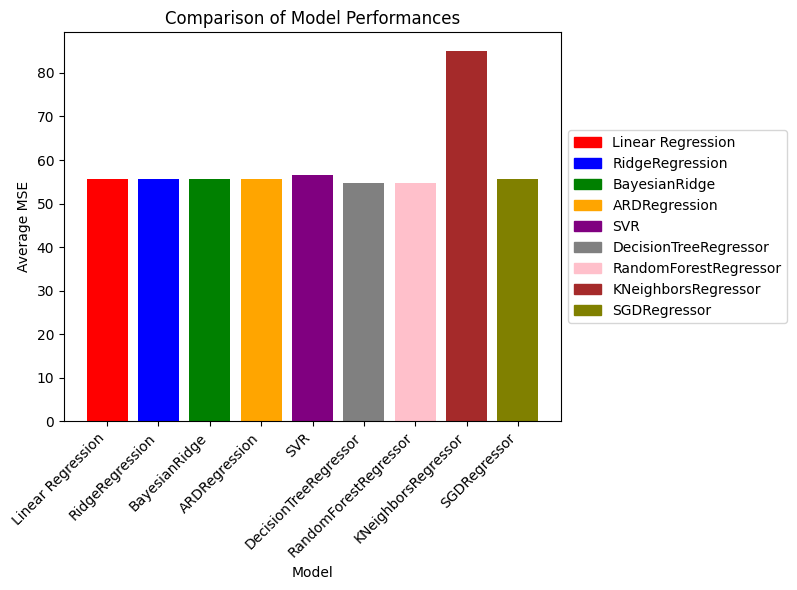

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
colors = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'pink', 'brown', 'olive']
plt.figure(figsize=(8,6))
plt.bar(model_performance['model'], model_performance['average_MSE'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Average MSE')
plt.title('Comparison of Model Performances')
handles = []
for i in range(len(model_performance)):
    handle = mpatches.Patch(color=colors[i], label=model_performance['model'][i])
    handles.append(handle)
plt.legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()